In [57]:
import pandas as pd
import os
import rasterio
import geopandas as gpd
import spacv
import matplotlib.pyplot as plt
import numpy as np

from shapely.geometry.point import Point

from IAdeforestation.preprocessing import *

In [58]:
LABELS_PATH = 'labels'
SHAPEFILES_PATHS = [os.path.join(LABELS_PATH, 'central_highlands_1_other', 'central_highlands_1_other.shp'),
 os.path.join(LABELS_PATH, 'central_highlands_2_test', 'central_highlands_2_test.shp'),
 os.path.join(LABELS_PATH, 'central_highlands_2_other', 'central_highlands_2_other.shp')]

SHAPEFILE_ESPG=4326

points = process_shapefile(SHAPEFILES_PATHS)

In [59]:
coords, labels = zip(*points)

In [60]:
coords_points = []
plt.show
for p in coords:
    coords_points.append(Point(p[0],p[1]))

In [61]:
vietnam = gpd.read_file("district/diaphanhuyen.shp")

In [62]:
geo_df = gpd.GeoDataFrame({'geometry':coords_points, 'labels':labels})

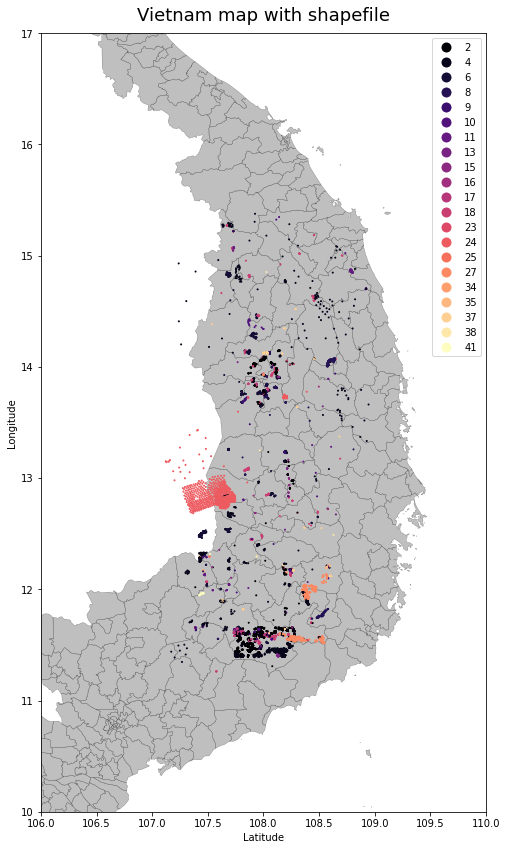

In [63]:
fig, ax = plt.subplots(figsize=(12,12))

vietnam.plot(ax=ax,facecolor='Grey', edgecolor='k',alpha=0.5,linewidth=0.3)
geo_df.plot(ax=ax, markersize=1,categorical=True, legend=True, column="labels", cmap="magma")
ax.set_ylim([10,17])
ax.set_xlim([106,110])
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
fig.suptitle("Vietnam map with shapefile", fontsize=18)
fig.tight_layout()

In [45]:
skcv = spacv.SKCV(n_splits=5, buffer_radius=0.1).split(geo_df['geometry'])

4860
5316
----
8101
2045
----
8842
1366
----
8625
1119
----
9813
423
----


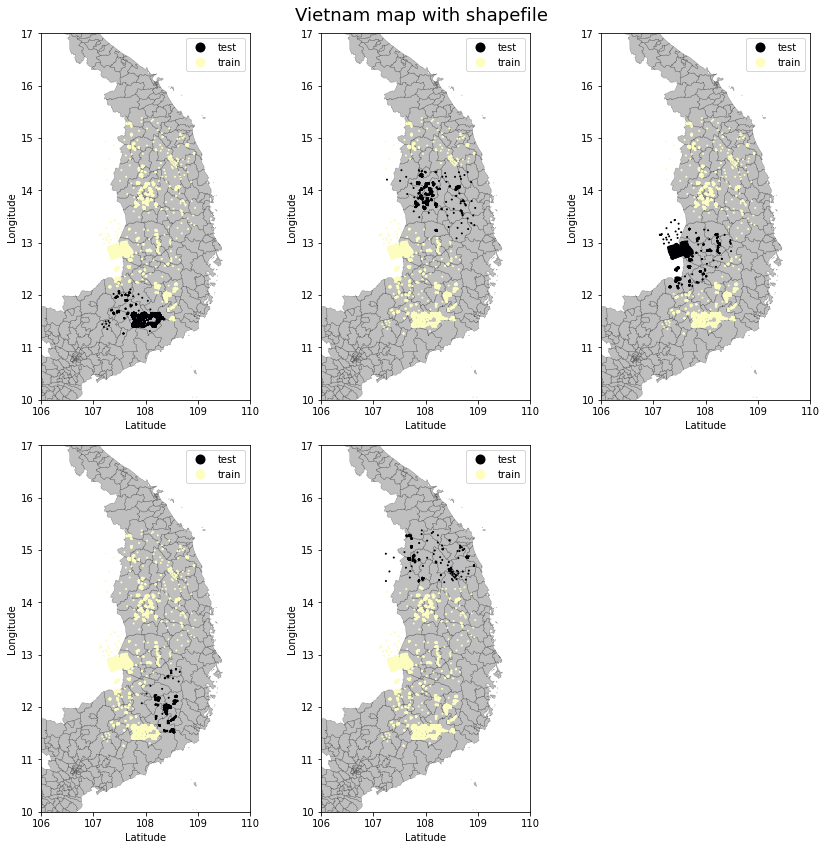

In [46]:
fig, axes = plt.subplots(figsize=(12,12), nrows=2, ncols=3)

axes = axes.flatten()

i = 0

for train, validation in skcv:
    ax = axes[i]
    train_points = geo_df['geometry'].to_numpy()[train]
    train_labels = np.array(["train"]*len(train_points))
    
    val_points = geo_df['geometry'].to_numpy()[validation]
    val_labels = np.array(["test"]*len(val_points))
    
    print(len(train_points))
    print(len(val_points))
    print("----")

    vietnam.plot(ax=ax,facecolor='Grey', edgecolor='k',alpha=0.5,linewidth=0.3)
    ax.set_ylim([10,17])
    ax.set_xlim([106,110])
    ax.set_xlabel("Latitude")
    ax.set_ylabel("Longitude")
    fig.suptitle("Vietnam map with shapefile", fontsize=18)
    fig.tight_layout()
    
    split_df = gpd.GeoDataFrame({'geometry':np.append(train_points,val_points), 'labels':np.append(train_labels,val_labels)})
    split_df.plot(ax=ax, markersize=1,categorical=True, legend=True, column="labels", cmap="magma")

    i+=1
    
fig.delaxes(ax= axes[-1]) 
